## Experiment 2 - influence of percentage visited per user on nDCG

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats

In [163]:
Path = "../results/"
ds = "gowalla"
alg = "STACP"
df_100 = pd.read_csv(Path+"result_top_20_100.txt", sep = "\t", header = None)
df_100.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
df_80 = pd.read_csv(Path+"result_top_20_80.txt", sep = "\t", header = None)
df_80.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
df_60 = pd.read_csv(Path+"result_top_20_60.txt", sep = "\t", header = None)
df_60.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
df_40 = pd.read_csv(Path+"result_top_20_40.txt", sep = "\t", header = None)
df_40.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]

df_100_noctx = pd.read_csv(Path+"result_top_20_100_noctx.txt", sep = "\t", header = None)
df_100_noctx.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
df_80_noctx = pd.read_csv(Path+"result_top_20_80_noctx.txt", sep = "\t", header = None)
df_80_noctx.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
df_60_noctx = pd.read_csv(Path+"result_top_20_60_noctx.txt", sep = "\t", header = None)
df_60_noctx.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
df_40_noctx = pd.read_csv(Path+"result_top_20_40_noctx.txt", sep = "\t", header = None)
df_40_noctx.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]

df_100_noTC = pd.read_csv(Path+"result_top_20_100_noTC.txt", sep = "\t", header = None)
df_100_noTC.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
df_80_noTC = pd.read_csv(Path+"result_top_20_80_noTC.txt", sep = "\t", header = None)
df_80_noTC.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
df_60_noTC = pd.read_csv(Path+"result_top_20_60_noTC.txt", sep = "\t", header = None)
df_60_noTC.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
df_40_noTC = pd.read_csv(Path+"result_top_20_40_noTC.txt", sep = "\t", header = None)
df_40_noTC.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]

df_100_lrt = pd.read_csv(Path+"lrt_top_20_100.txt", sep = "\t", header = None)
df_100_lrt.columns = ["cnt", "uid", "prec", "rec", "ndcg"]
df_80_lrt = pd.read_csv(Path+"lrt_top_20_80.txt", sep = "\t", header = None)
df_80_lrt.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
df_60_lrt = pd.read_csv(Path+"lrt_top_20_60.txt", sep = "\t", header = None)
df_60_lrt.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
df_40_lrt = pd.read_csv(Path+"lrt_top_20_40.txt", sep = "\t", header = None)
df_40_lrt.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]

In [169]:
ex2 = pd.DataFrame(columns = ["visited","STACP-nDCG", "STACP-map", "STACP-rec", "STACP-prec","STACP-noTC-nDCG", "STACP-noTC-map", "STACP-noTC-rec", "STACP-noTC-prec","STACP-noCTX-nDCG", "STACP-noCTX-map", "STACP-noCTX-rec", "STACP-noCTX-prec","LRT-nDCG", "LRT-map", "LRT-rec", "LRT-prec"]) 
ex2 = ex2.append({'visited':40,'STACP-nDCG':df_40["ndcg"].mean(),  'STACP-map':df_40["map"].mean(),  'STACP-rec':df_40["rec"].mean(),  'STACP-prec':df_40["prec"].mean(),'STACP-noCTX-nDCG':df_40_noctx["ndcg"].mean(),  'STACP-noCTX-map':df_40["map"].mean(),  'STACP-noCTX-rec':df_40["rec"].mean(),  'STACP-noCTX-prec':df_40["prec"].mean(),'STACP-noTC-nDCG':df_40_noTC["ndcg"].mean(),  'STACP-noTC-map':df_40["map"].mean(),  'STACP-noTC-rec':df_40["rec"].mean(),  'STACP-noTC-prec':df_40["prec"].mean(),'LRT-nDCG':df_40_lrt["ndcg"].mean(),  'LRT-map':df_40_lrt["map"].mean(),  'LRT-rec':df_40_lrt["rec"].mean(),  'LRT-prec':df_40_lrt["prec"].mean()}, ignore_index=True)
ex2 = ex2.append({'visited':60,'STACP-nDCG':df_60["ndcg"].mean(),  'STACP-map':df_60["map"].mean(),  'STACP-rec':df_60["rec"].mean(),  'STACP-prec':df_60["prec"].mean(),'STACP-noCTX-nDCG':df_60_noctx["ndcg"].mean(),  'STACP-noCTX-map':df_60["map"].mean(),  'STACP-noCTX-rec':df_60["rec"].mean(),  'STACP-noCTX-prec':df_60["prec"].mean(),'STACP-noTC-nDCG':df_60_noTC["ndcg"].mean(),  'STACP-noTC-map':df_60["map"].mean(),  'STACP-noTC-rec':df_60["rec"].mean(),  'STACP-noTC-prec':df_60["prec"].mean(),'LRT-nDCG':df_60_lrt["ndcg"].mean(),  'LRT-map':df_60_lrt["map"].mean(),  'LRT-rec':df_60_lrt["rec"].mean(),  'LRT-prec':df_60_lrt["prec"].mean()}, ignore_index=True)
ex2 = ex2.append({'visited':80,'STACP-nDCG':df_80["ndcg"].mean(),  'STACP-map':df_80["map"].mean(),  'STACP-rec':df_80["rec"].mean(),  'STACP-prec':df_80["prec"].mean(),'STACP-noCTX-nDCG':df_80_noctx["ndcg"].mean(),  'STACP-noCTX-map':df_80["map"].mean(),  'STACP-noCTX-rec':df_80["rec"].mean(),  'STACP-noCTX-prec':df_80["prec"].mean(),'STACP-noTC-nDCG':df_80_noTC["ndcg"].mean(),  'STACP-noTC-map':df_80["map"].mean(),  'STACP-noTC-rec':df_80["rec"].mean(),  'STACP-noTC-prec':df_80["prec"].mean(),'LRT-nDCG':df_80_lrt["ndcg"].mean(),  'LRT-map':df_80_lrt["map"].mean(),  'LRT-rec':df_80_lrt["rec"].mean(),  'LRT-prec':df_80_lrt["prec"].mean()}, ignore_index=True)
ex2 = ex2.append({'visited':100,'STACP-nDCG':df_100["ndcg"].mean(),  'STACP-map':df_100["map"].mean(),  'STACP-rec':df_100["rec"].mean(),  'STACP-prec':df_100["prec"].mean(),'STACP-noCTX-nDCG':df_100_noctx["ndcg"].mean(),  'STACP-noCTX-rec':df_100["rec"].mean(),'STACP-noCTX-map':df_100["map"].mean(),   'STACP-noCTX-prec':df_100["prec"].mean(),'LRT-nDCG':df_100_lrt["ndcg"].mean(), 'LRT-rec':df_100_lrt["rec"].mean(),  'LRT-prec':df_100_lrt["prec"].mean(),'STACP-noTC-nDCG':df_100_noTC["ndcg"].mean(),  'STACP-noTC-map':df_100["map"].mean(),  'STACP-noTC-rec':df_100["rec"].mean(),  'STACP-noTC-prec':df_100["prec"].mean()}, ignore_index=True)

#}, ignore_index=True)

#,'STACP-noCT-nDCG':df_100_noTC["ndcg"].mean(),  'STACP-noCT-map':df_100["map"].mean(),  'STACP-noCT-rec':df_100["rec"].mean(),  'STACP-noCT-prec':df_100["prec"].mean()}, ignore_index=True)

#,'LRT-nDCG':df_100_lrt["ndcg"].mean(),  'LRT-map':df_100_lrt["map"].mean(),  'LRT-rec':df_100_lrt["rec"].mean(),  'LRT-prec':df_100_lrt["prec"].mean()}, ignore_index=True)


In [170]:
ex2

,visited,STACP-nDCG,STACP-map,STACP-rec,STACP-prec,STACP-noTC-nDCG,STACP-noTC-map,STACP-noTC-rec,STACP-noTC-prec,STACP-noCTX-nDCG,STACP-noCTX-map,STACP-noCTX-rec,STACP-noCTX-prec,LRT-nDCG,LRT-map,LRT-rec,LRT-prec
0,40.0,0.028952,0.015974,0.053464,0.026457,0.017900,0.015974,0.053464,0.026457,0.003789,0.015974,0.053464,0.026457,0.002728,0.021740,0.021871,0.002914
1,60.0,0.031180,0.017743,0.058430,0.028483,0.018438,0.017743,0.058430,0.028483,0.010500,0.017743,0.058430,0.028483,0.015254,0.027080,0.030965,0.018674
2,80.0,0.034059,0.019537,0.062946,0.030792,0.021269,0.019537,0.062946,0.030792,0.014465,0.019537,0.062946,0.030792,0.014459,0.025747,0.030815,0.018017
3,100.0,0.036401,0.021671,0.066694,0.032578,0.025034,0.021671,0.066694,0.032578,0.018394,0.021671,0.066694,0.032578,0.017435,NaN,0.032579,0.019545


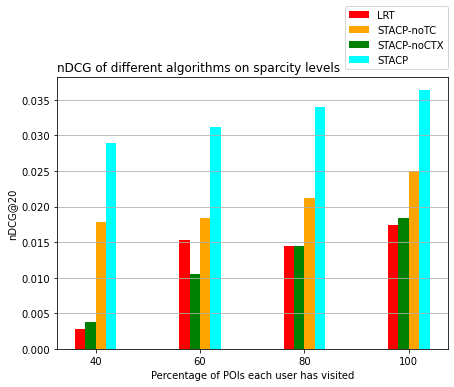

In [171]:
# create data 
x = np.arange(4) 
y1 = ex2["STACP-nDCG"]
y2 = ex2["STACP-noTC-nDCG"]
y3 = ex2["STACP-noCTX-nDCG"]
y4 = ex2["LRT-nDCG"]
width = 0.1
  
# plot data in grouped manner of bar type 
plt.figure(figsize=(7,5));
plt.bar(x-0.15, y4, width, color='red') 
plt.bar(x+0.05, y2, width, color='orange') 
plt.bar(x-0.05, y3, width, color='green') 
plt.bar(x+0.15, y1, width, color='cyan') 

#plt.bar(x+0.15, y4, width, color='red') 

plt.xticks(x, ['40', '60','80', '100']) 
plt.legend(["LRT", "STACP-noTC", "STACP-noCTX", "STACP"], bbox_to_anchor=(1, 1.26),borderaxespad=0) 
plt.xlabel("Percentage of POIs each user has visited") 
plt.ylabel("nDCG@20") 
plt.grid(axis = 'y')
plt.title("nDCG of different algorithms on sparcity levels", loc = "left")
plt.show() 

C:\Users\katri\anaconda3\lib\site-packages\numpy\lib\stride_tricks.py:256: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
C:\Users\katri\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


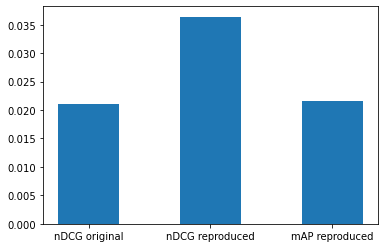

In [182]:
# create data 

#width = 0.5
  
# plot data in grouped manner of bar type 
#plt.figure(figsize=(7,5));
plt.bar(["nDCG original", "nDCG reproduced", "mAP reproduced"], [0.0211, ex2.loc[ex2["visited"]==100,"STACP-nDCG"],[ex2.loc[ex2["visited"]==100,"STACP-map"]]], width) 
# plt.bar(x+0.05, y2, width, color='orange') 
# plt.bar(x-0.05, y3, width, color='green') 
# plt.bar(x+0.15, y1, width, color='cyan') 

# #plt.bar(x+0.15, y4, width, color='red') 

# plt.xticks(x, ['40', '60','80', '100']) 
# plt.legend(["LRT", "STACP-noTC", "STACP-noCTX", "STACP"], bbox_to_anchor=(1, 1.26),borderaxespad=0) 
# plt.xlabel("Percentage of POIs each user has visited") 
# plt.ylabel("nDCG@20") 
# plt.grid(axis = 'y')
#plt.title("nDCG@20 and mAP@20 compared for top 20 recommendation", loc = "left")
plt.show() 

In [18]:
print(stats.ttest_1samp(df_100["prec"],0.0146))
print(stats.ttest_1samp(df_100["rec"],0.0270))
print(stats.ttest_1samp(df_100["ndcg"],0.0079))

Ttest_1sampResult(statistic=26.13188265167397, pvalue=3.586215542013316e-142)
Ttest_1sampResult(statistic=24.996222490347336, pvalue=7.376677438656684e-131)
Ttest_1sampResult(statistic=34.82950904126524, pvalue=7.225210493794448e-241)


In [183]:
stats.ttest_ind(df_100["map"], df_["map"])

Ttest_indResult(statistic=2.1517390334616815, pvalue=0.03143912283317608)